<a href="https://colab.research.google.com/github/dgymjol/cs231n/blob/main/YAI_2%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# < 활성화 함수(Activation function)의 역할과 조건 >

- **팀원분들과 함께 하였습니다!**

1. ***활성화 함수(Activation function)는 딥러닝 네트워크에서 어떤 역할을 하나요?***

활성화 함수마다 구체적인 역할이 조금씩 다르지만 근본적으로, 네트워크 상에 비선형성(non-linearity)를 부여한다. 만약 어떤 딥러닝 네트워크가 선형함수만으로 이루어져 있다면, 이는 하나의 뉴런만으로도 표현이 가능하다. 하지만 활성화함수를 통해 비선형성을 부여함으로써, 네트워크의 뉴런들간에 구분을 만들어주어 네트워크 학습시에 훨씬 더 deep한 학습을 효과적으로 수행할 수 있게 만들어 준다. 

2. ***위에서 대답한 역할을 수행하기 위해 활성화 함수가 가져야 할 조건은 무엇인가요?***

결국 활성화 함수의 목적은 deep한 학습을 효율적으로 하기 위함이다. 그러기 위해선 다음의 조건을 만족해야 한다.


*   비선형성-> 앞서 말했듯, 활성화함수에 비선형성이 존재하지 않는다면 활성화함수의 의미 자체가 사라지게 된다.
*   미분가능성-> 딥러닝을 학습할 때에는 대부분 backprop과 GD를 이용해서 학습을 진행하기 때문에 미분이 가능해야 한다.
*   단조성 -> 만약 활성화 함수가 단조 증가나 단조 감소하지 않는다면, affine층으로부터 전달된 값이 충분히 output에 반영되지 않기 때문에 온전히 weight에 의한 값을 다음 neuron으로 전달하기 위해선 단조성을 가져야한다.
*   빠른 수렴속도 -> 분류의 기준점이 되는 임계점값에 접근하는 수렴속도가 빨라야 학습속도도 빠르게 진행될 수 있다.
*   기울기가 너무 크게 증가하거나 감소해서는 안된다-> deep한 네트워크에서는 backprop시에 gradient가 vanish하거나 overflood할 수 있기 때문이다.

### Module Import & Set Device

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)  # 랜덤 시드 고정

if device == 'cuda':
    torch.cuda.manual_seed_all(777) # GPU 사용 가능할경우 랜덤 시드 고정

# Activation Function 구현

3. ***주어진 주피터노트북 코드의 #TODO#를 PyTorch를 사용해 작성하여 각 활성화함수를 구현해보세요.***

4. ***Custom activation function을 정의해 각 팀이 생각하는 조건을 갖춘 활성화 함수를 만들고 설명해주세요.***


### Abstract Class for each Activation Funtion

In [3]:
class BaseActivation:
    def __init__(self):
        pass
    
    def __call__(self, x):
        return x
    
    def parameters(self):
        return []

### Sigmoid

In [4]:
# Hint: torch.exp함수를 사용해보세요.
# Hint: https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

class sigmoid(BaseActivation):
    def __call__(self, x):
        ################ TODO ################
        return torch.div(torch.tensor(1.0), torch.add(torch.tensor(1.0), torch.exp(torch.negative(x))))
        ################ TODO ################

### ReLU
Relu(x) = max(0, x)

In [5]:
zero_tensor = torch.Tensor([0]).to(device)

In [6]:
# Hint: torch.maximum과 zero_tensor를 활용해보세요.
# Hint: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU

class relu(BaseActivation):
    def __call__(self, x):
        ################ TODO ################
        return torch.maximum(zero_tensor, x)
        ################ TODO ################

### Leaky ReLU

In [7]:
# Hint 1: torch.Tensor를 활용해 negative slope를 정의하세요
# Hint 2: torch.where를 활용해 조건에 따른 return값을 설정해보세요
# Hint: https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html?highlight=leakyrelu

class leakyrelu(BaseActivation):
    def __init__(self):
        ################ TODO ################
        self.negative_slope = torch.tensor(0.01)
        ################ TODO ################
        
    def __call__(self, x):
        ################ TODO ################
        return torch.where(x>= 0, x, self.negative_slope * x)
        ################ TODO ################

### PReLU

In [8]:
# Hint: 위와 마찬가지로 조건에 따른 return값을 설정해보세요.
# Hint: https://pytorch.org/docs/stable/generated/torch.nn.PReLU.html?highlight=prelu#torch.nn.PReLU

class prelu(BaseActivation):
    def __init__(self):
        self.alpha = torch.empty(1).fill_(0.25).to(device).requires_grad_()
        
    def __call__(self, x):
        ################ TODO ################
        return torch.where(x>= 0, x, self.alpha * x)      
        ################ TODO ################
        
    def parameters(self):
        return [self.alpha]

### ELU

In [9]:
# Hint: https://pytorch.org/docs/stable/generated/torch.nn.ELU.html?highlight=elu#torch.nn.ELU

class elu(BaseActivation):
    def __init__(self):
        self.alpha = torch.empty(1).fill_(1.0).to(device).requires_grad_()
        
    def __call__(self, x):
        ################ TODO ################
        return torch.where(x>= 0, x, self.alpha * torch.add(torch.exp(x), torch.tensor(-1.0)))
        ################ TODO ################
    
    def parameters(self):
        return [self.alpha]

###Your Custom Activation Function

saturated가 일어나지 않는 것과 동시에 exp 과 같이 기울기가 크게 증가하게 되지 않도록 고민하다가 Leaky ReLU에서 x>0 부분을 변형시켜보자는 의견이 있었습니다. 그래서 x^3, x^1.5 log(x) 등으로 다양하게 변형시켜서 해보다가 x^2에 계수를 PReLU처럼 alpha로 설정해서 해보았습니다. 이 때가 가장 성능이 좋았는데 이유는 아직 잘 모르겠습니다ㅠㅠ

In [10]:
# Custom activation을 만들어보세요.
class my_activation(BaseActivation):
    def __init__(self):
        ################ TODO ################
        self.negative_slope = torch.tensor(0.03)
        # self.coef = torch.tensor(0.1)
        self.coef = torch.empty(1).fill_(0.25).to(device).requires_grad_()
        ################ TODO ################
        
    def __call__(self, x):
        ################ TODO ################

        return torch.where(x>= 0, self.coef*torch.square(x), self.negative_slope * x) # if) coef = 0.1 => best_acc: 0.8049
        # return torch.where(x>= 0, torch.pow(x, 3), self.negative_slope * x) # => best_acc: 0.1686
        # return torch.where(x>= 0, torch.square(x), self.negative_slope * x) # => best_acc : 0.6771
        # return torch.where(x>= 0, torch.log(x), self.negative_slope * x) => best_acc : 0.1106
        ################ TODO ################

# MNIST 손글씨 이미지 분류하기


### 하이퍼파라미터 세팅

In [11]:
learning_rate = 0.01
epochs = 10
batch_size = 1024

### 데이터셋, 데이터 로더 정의

In [12]:
#손글씨 분류를 위한 데이터셋인 MNIST 데이터셋 다운로드

mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True로 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서 데이터로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False로 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서 데이터로 변환
                         download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [13]:
# 다운로드 한 데이터셋을 이용해 데이터 로더 정의
# 데이터 로더는 iterable type으로, 반복문을 사용하여 한 번에 배치 사이즈만큼 데이터를 불러올 수 있음

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

total_batch = len(data_loader)  # Mini-batch의 개수 = (전체 데이터 수 / batch size)

### 모델(신경망) 구조 정의

In [14]:
class Net(torch.nn.Module):
    def __init__(self, use):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 64) # input image shape가 가로 28, 세로 28이므로 28*28
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 16)
        self.fc4 = torch.nn.Linear(16, 10) # 최종 예측 클래스 종류는 0~9, 10가지이므로 10개
        
        # 파라미터로 주어진 activation 종다르게 설정
        if use == 'relu':
            self.activation = relu()
        elif use == 'sigmoid':
            self.activation = sigmoid()
        elif use == 'prelu':
            self.activation = prelu()
        elif use == 'leaky_relu':
            self.activation = leakyrelu()
        elif use == 'elu':
            self.activation = elu()
        elif use == 'custom':
            self.activation = my_activation()
            
    # fc1 -> activation -> fc2
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

### 모델 Training

In [15]:
# 모델을 생성하고 학습시킨 후, 성능을 performance_dict에 저장하는 함수
def train_eval(use):
    global performance_dict
    model = Net(use).to(device)
    criterion = torch.nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(list(model.parameters()) + model.activation.parameters(), lr=learning_rate)

    start = time.time(); test_accs = []
    print(f"\n###### Using Activation Function: {use.upper()} ######")
    for epoch in range(epochs):
        avg_loss = 0
        avg_acc = 0

        for X, Y in data_loader:
            X = X.to(device)
            Y = Y.to(device)

            optimizer.zero_grad()
            prediction = model(X)
            loss = criterion(prediction, Y)
            acc = (torch.argmax(prediction, 1) == Y).float().mean().item()
            loss.backward()
            optimizer.step()

            avg_loss += loss / total_batch
            avg_acc += acc / total_batch

        print(f'[Epoch: {epoch+1:>2}] train_loss: {avg_loss:.4f}, train_acc: {avg_acc:.4f}, ', end="")

        with torch.no_grad():
            X_test = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
            Y_test = mnist_test.targets.to(device)

            test_prediction = model(X_test)
            correct_prediction = torch.argmax(test_prediction, 1) == Y_test
            test_accuracy = correct_prediction.float().mean().item()
            test_accs.append(test_accuracy)
            print(f"test_acc: {test_accuracy:.4f}, best_acc: {max(test_accs):.4f}")
    
    performance_dict[use] = {'time': time.time()-start, 'accuracy' : max(test_accs)}

### 성능 확인

In [16]:
performance_dict = {}
for use in ['relu', 'sigmoid', 'prelu', 'leaky_relu', 'elu', 'custom']:   #위에서 정의한 각 활성화함수를 이용해 훈련
    train_eval(use)
performance_df = pd.DataFrame(performance_dict).T


###### Using Activation Function: RELU ######
[Epoch:  1] train_loss: 0.8153, train_acc: 0.7293, test_acc: 0.9053, best_acc: 0.9053
[Epoch:  2] train_loss: 0.2387, train_acc: 0.9306, test_acc: 0.9416, best_acc: 0.9416
[Epoch:  3] train_loss: 0.1682, train_acc: 0.9501, test_acc: 0.9548, best_acc: 0.9548
[Epoch:  4] train_loss: 0.1318, train_acc: 0.9600, test_acc: 0.9485, best_acc: 0.9548
[Epoch:  5] train_loss: 0.1047, train_acc: 0.9690, test_acc: 0.9609, best_acc: 0.9609
[Epoch:  6] train_loss: 0.0904, train_acc: 0.9723, test_acc: 0.9651, best_acc: 0.9651
[Epoch:  7] train_loss: 0.0792, train_acc: 0.9754, test_acc: 0.9635, best_acc: 0.9651
[Epoch:  8] train_loss: 0.0713, train_acc: 0.9777, test_acc: 0.9683, best_acc: 0.9683
[Epoch:  9] train_loss: 0.0619, train_acc: 0.9812, test_acc: 0.9691, best_acc: 0.9691
[Epoch: 10] train_loss: 0.0541, train_acc: 0.9833, test_acc: 0.9656, best_acc: 0.9691

###### Using Activation Function: SIGMOID ######
[Epoch:  1] train_loss: 1.7322, train_acc: 

In [17]:
performance_df

,time,accuracy
relu,73.080182,0.9691
sigmoid,73.898073,0.9557
prelu,73.758687,0.9704
leaky_relu,72.982317,0.9712
elu,73.660609,0.9289
custom,73.887656,0.8984


Best Accuracy Activation Function was: 0.9712, leaky_relu
Custom Activation Function Accuracy Rank: 6
Custom Activation Function Time Complexity Rank: 5


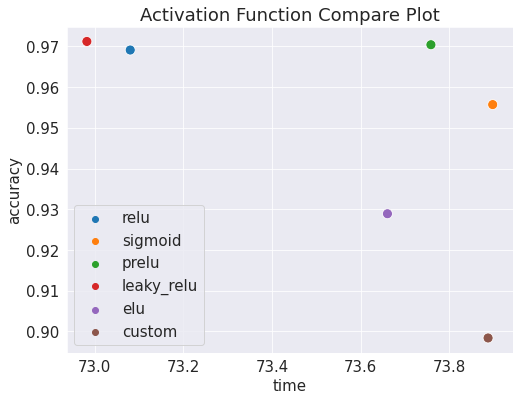

In [18]:
print(f"Best Accuracy Activation Function was: {performance_df['accuracy'].max():.4f}, {performance_df.index[performance_df['accuracy'].argmax()]}")
print(f"Custom Activation Function Accuracy Rank: {int(performance_df['accuracy'].rank(method='max', ascending=False)['custom'])}")
print(f"Custom Activation Function Time Complexity Rank: {int(performance_df['time'].rank(method='min')['custom'])}")

plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 15})
plt.title("Activation Function Compare Plot")
sns.scatterplot(data=performance_df, x='time', y='accuracy', hue=performance_df.index, s=100)
plt.show()


# < 손글씨 이미지 분류 >

5. ***손글씨 이미지 분류 성능이 활성화 함수에 따라 어떻게 달라지는지 확인해보세요.***


6. ***가장 성능이 좋았던, 그리고 가장 빠르게 모델이 학습되었던 활성화 함수는 각각 무엇인가요? 정의된 모델 구조를 참고하여 왜 그러한 결과가 나왔는지 분석해주세요.***

leaky Relu가 가장 빠르고 성능도 좋았습니다.

relu, leaky ReLu가 다른 활성화함수를 쓴 모델에 비해 학습 속도가 빨랐던 이유는 함수 계산 내에서 exp연산이 없었고, 미분도 간단한 형태였기 때문이라고 추측할 수 있습니다.

또한 relu와 relu에서 파생된 swish, prelu, leaky relu 모두 높은 정확도를 보였는데, 그 이유를 분석한 결과는 다음과 같습니다.

위에 언급한 활성화 함수들은 모두 0이라는 어떤 임계점보다 높으면 크게 활성화되고 그보다 작으면 활성화정도를 거의 0에 가깝게 확 줄임으로써, 분류에 대한 활성화 역할을 하기 때문에 데이터셋의 특성 자체에 대한 성능면에서는 유의미하게 큰 차이는 보이지 않는 것 같습니다. 그리고 이렇게 분류하는 방식이 같은 숫자라 하더라도 손글씨로 인해 이미지의 편차가 심한 MNIST 데이터셋에 대해서는 정규화 능력(어떤 대상을 규칙이나 기준에 따르는 상태로 바꾸는 것)이 덜 해야한다는 점에 잘 부합하기 때문에 다른 활성화 함수에 비해 높은 성능을 보이는 것 같습니다. elu의 경우는 위의 활성화 함수들과 비슷한 듯 하지만 음의 영역에서 saturation 문제가 해결되지 않았습니다. elu는 오히려 이런 saturation으로 인해 noise를 거를 수 있는 능력이 더 좋다고 주장한다고 하는데, MNIST 데이터셋은 흰바탕에 검은색 손글씨만이 있는 이미지이기 때문에 noise가 다른 데이터셋보다 적고 그렇기 때문에 이런 점에서 elu가 staturation 문제가 해결된 다른 활성화 함수에 비해 정확도가 낮은 것 같습니다. 
sigmoid 역시 staturation이 있기 때문에 이러한 관점에서 elu와 비슷하게 이해할 수 있을 것 같습니다.